<a href="https://colab.research.google.com/github/rafiafsan/Epileptic-Seizure-Detection-Using-Artificial-Intielligence-BUBT-NINS-/blob/main/Filter_eeg_channels_from_eeg_raw_signals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mne --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 63.2 MB/s eta 0:00:00


In [3]:
import mne
from google.colab import files
import os

In [4]:
uploaded = files.upload()

Saving DA0010A0.EEG to DA0010A0.EEG


In [5]:
# Replace 'your_file.eeg' with the actual path to your .eeg file
file_path = '/content/DA0010A0.EEG'

# Attempt to read the file using the generic reader
try:
    raw = mne.io.read_raw(file_path, preload=True)

    # Display information about the loaded data
    print(raw.info)

except Exception as e:
    print(f"Could not read the file using mne.io.read_raw: {e}")
    print("It's possible this .eeg file is in a format not directly supported by MNE, or is corrupted.")

Loading DA0010A0.EEG
Reading header from /content/DA0010A0.EEG


/tmp/ipython-input-1376991540.py:6: RuntimeWarning: Could not find /content/DA0010A0.21E containing channel definitions; Default channel names are chosen.
  raw = mne.io.read_raw(file_path, preload=True)
/tmp/ipython-input-1376991540.py:6: RuntimeWarning: No PNT file exists. Metadata will be blank
  raw = mne.io.read_raw(file_path, preload=True)


Reading 0 ... 938999  =      0.000 ...  1877.998 secs...
<Info | 7 non-empty values
 bads: []
 ch_names: FP1, FP2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, T5, ...
 chs: 23 EEG, 11 misc, 7 BIO, 2 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 43
 projs: []
 sfreq: 500.0 Hz
>


/tmp/ipython-input-1376991540.py:6: RuntimeWarning: No LOG file exists. Annotations will not be read
  raw = mne.io.read_raw(file_path, preload=True)


In [10]:
eeg_channels = [
    'FP1', 'FP2',
    'F3', 'F4',
    'C3', 'C4',
    'P3', 'P4',
    'O1', 'O2',
    'F7', 'F8',
    'T3', 'T4',
    'T5', 'T6',
    'FZ', 'CZ', 'PZ'
]

In [11]:
raw.pick_channels(eeg_channels)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<RawNihon | DA0010A0.EEG, 19 x 939000 (1878.0 s), ~136.1 MiB, data loaded>

/tmp/ipython-input-1412498728.py:1: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['FZ', 'CZ', 'PZ']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage('standard_1020', match_case=False)


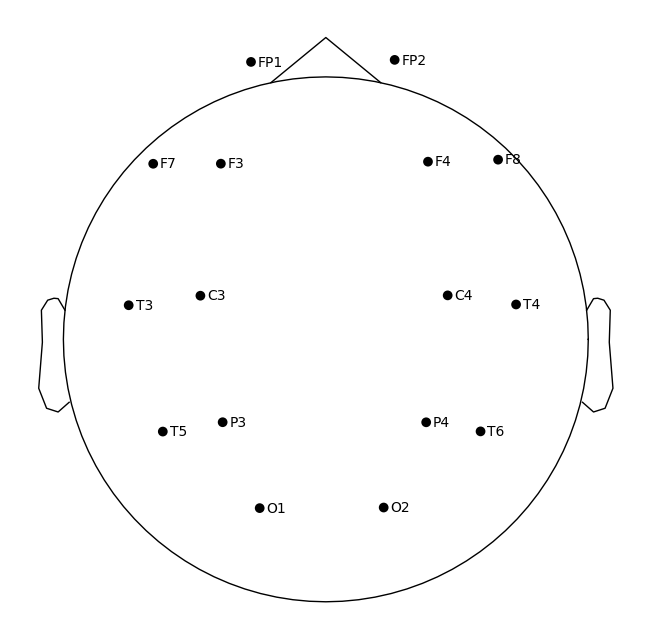

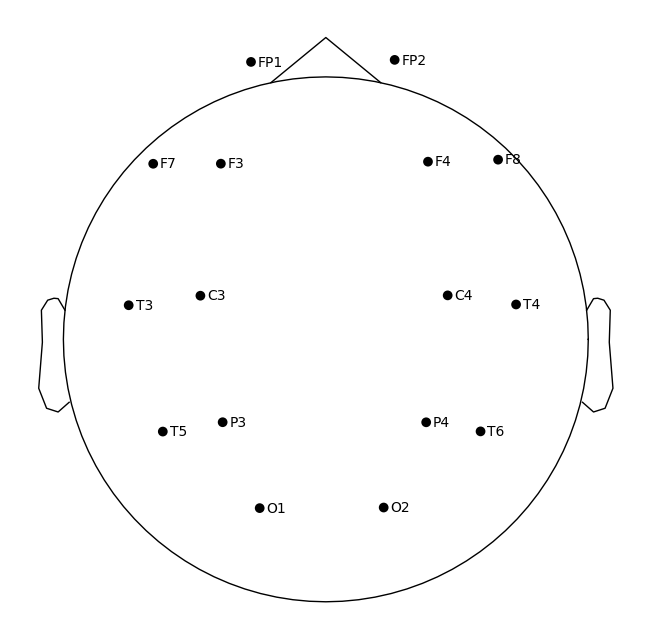

In [12]:
raw.set_montage('standard_1020', match_case=False)
raw.plot_sensors(show_names=True)


In [14]:
!pip install eeglabio

In [16]:
# Define a file path for the output .set file
output_file_path = '/content/DA0010A4_eeg.set'

# Save the data to the specified file path in the 'eeglab' format
raw.export(output_file_path, fmt='eeglab', overwrite=True)

print(f"EEG data saved to {output_file_path}")

EEG data saved to /content/DA0010A4_eeg.set
